___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.7


In [2]:
#!pip install tensorflow

In [3]:
#!pip install tensorflow==2.0

In [4]:
#!pip install --ignore-installed --upgrade tensorflow==2.6

In [5]:
import tensorflow as tf
tf.__version__

'2.8.0'

# Keras Syntax Basics

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [9]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [10]:
df.head()

price  feature1  feature2
0 461.528   999.788   999.766
1 548.130   998.862  1001.042
2 410.297  1000.070   998.844
3 540.382   999.952  1000.441
4 546.025  1000.446  1000.339

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [12]:
df.describe().T

count     mean    std     min     25%      50%      75%      max
price    1000.000  498.673 93.785 223.347 433.026  502.382  564.922  774.408
feature1 1000.000 1000.014  0.974 997.058 999.332 1000.010 1000.638 1003.208
feature2 1000.000  999.980  0.948 996.996 999.316 1000.002 1000.645 1002.666

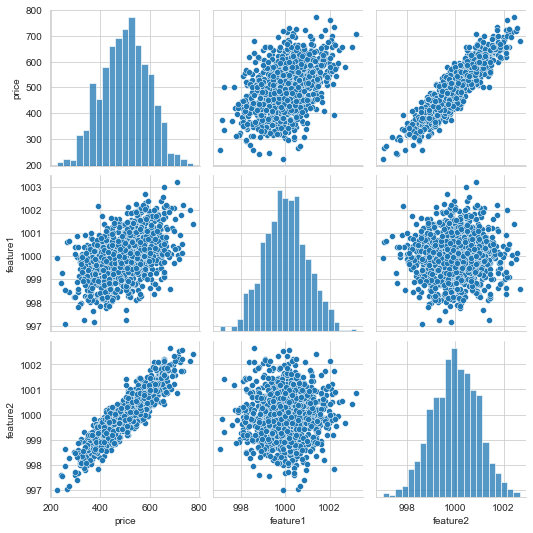

In [13]:
sns.pairplot(df);

In [14]:
df.corr()

price  feature1  feature2
price     1.000     0.444     0.908
feature1  0.444     1.000     0.031
feature2  0.908     0.031     1.000

## Preprocessing of Data
- Train | Test Split, Scalling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [17]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [18]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
X_train.shape

(700, 2)

In [21]:
X_test.shape

(300, 2)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train.max()

1.0

In [27]:
X_train.min()

0.0

In [28]:
X_test.max()

1.0186515935232023

In [29]:
X_test.min()

-0.014108392024525074

## Modelling

In [30]:
import tensorflow as tf

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [32]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [33]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [34]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
            a        Dense(units = 1)])

In [35]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1]
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [36]:
model.compile(optimizer = "rmsprop", loss = "mse")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [37]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 0s 1000us/step - loss: 256250.5156
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 255930.4844
Epoch 3/250
22/22 [==============================] - 0s 857us/step - loss: 255598.4531
Epoch 4/250
22/22 [==============================] - 0s 810us/step - loss: 255230.3281
Epoch 5/250
22/22 [==============================] - 0s 857us/step - loss: 254823.7656
Epoch 6/250
22/22 [==============================] - 0s 762us/step - loss: 254361.0000
Epoch 7/250
22/22 [==============================] - 0s 905us/step - loss: 253824.7812
Epoch 8/250
22/22 [==============================] - 0s 857us/step - loss: 253206.5625
Epoch 9/250
22/22 [==============================] - 0s 810us/step - loss: 252507.4531
Epoch 10/250
22/22 [==============================] - 0s 857us/step - loss: 251706.6719
Epoch 11/250
22/22 [==============================] - 0s 857us/step - loss: 250781.9219
Epoch 12/250
22/22 [======================

22/22 [==============================] - 0s 905us/step - loss: 1218.0337
Epoch 96/250
22/22 [==============================] - 0s 857us/step - loss: 1178.3210
Epoch 97/250
22/22 [==============================] - 0s 857us/step - loss: 1138.5750
Epoch 98/250
22/22 [==============================] - 0s 953us/step - loss: 1093.2944
Epoch 99/250
22/22 [==============================] - 0s 762us/step - loss: 1049.1869
Epoch 100/250
22/22 [==============================] - 0s 810us/step - loss: 1009.1015
Epoch 101/250
22/22 [==============================] - 0s 905us/step - loss: 966.9780
Epoch 102/250
22/22 [==============================] - 0s 810us/step - loss: 927.8810
Epoch 103/250
22/22 [==============================] - 0s 953us/step - loss: 889.7016
Epoch 104/250
22/22 [==============================] - 0s 905us/step - loss: 856.7584
Epoch 105/250
22/22 [==============================] - 0s 905us/step - loss: 818.0546
Epoch 106/250
22/22 [==============================] - 0s 905us/st

22/22 [==============================] - 0s 810us/step - loss: 24.6150
Epoch 192/250
22/22 [==============================] - 0s 857us/step - loss: 24.5660
Epoch 193/250
22/22 [==============================] - 0s 810us/step - loss: 25.0994
Epoch 194/250
22/22 [==============================] - 0s 829us/step - loss: 24.9669
Epoch 195/250
22/22 [==============================] - 0s 834us/step - loss: 24.9055
Epoch 196/250
22/22 [==============================] - 0s 857us/step - loss: 24.3676
Epoch 197/250
22/22 [==============================] - 0s 810us/step - loss: 24.5864
Epoch 198/250
22/22 [==============================] - 0s 857us/step - loss: 24.4103
Epoch 199/250
22/22 [==============================] - 0s 857us/step - loss: 24.3531
Epoch 200/250
22/22 [==============================] - 0s 857us/step - loss: 25.0715
Epoch 201/250
22/22 [==============================] - 0s 810us/step - loss: 24.4655
Epoch 202/250
22/22 [==============================] - 0s 810us/step - loss: 24

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.9346328 ,  0.88515127,  0.0907945 ,  1.4332968 ],
        [ 0.16858587,  1.7369299 , -0.2965408 ,  2.9599135 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([-0.08601572,  0.41595423, -0.05092511,  0.48999223], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.69976896, -0.4002092 ,  0.05083232, -0.11976647],
        [ 1.5439816 ,  1.5622473 ,  2.0809557 ,  1.9320279 ],
        [-0.813971  , -0.59742886,  0.06870858, -0.48860922],
        [ 1.6936885 ,  2.4107456 ,  2.1029732 ,  2.057556  ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.2896016 , 0.47352996, 0.47681972, 0.30142695], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[1.333579  , 0.74076533, 1.8550411 , 1.8269907 ],
        [1.6952958 , 2.0569146 , 1.52116

In [40]:
model.history.history

{'loss': [256250.515625,
  255930.484375,
  255598.453125,
  255230.328125,
  254823.765625,
  254361.0,
  253824.78125,
  253206.5625,
  252507.453125,
  251706.671875,
  250781.921875,
  249716.921875,
  248480.3125,
  247055.15625,
  245452.640625,
  243676.15625,
  241681.28125,
  239497.71875,
  237104.75,
  234485.734375,
  231648.5,
  228568.203125,
  225250.265625,
  221666.3125,
  217843.359375,
  213743.703125,
  209360.359375,
  204698.109375,
  199749.390625,
  194537.890625,
  189029.96875,
  183229.65625,
  177180.578125,
  170863.0,
  164237.171875,
  157394.640625,
  150263.984375,
  142892.4375,
  135333.59375,
  127607.953125,
  119673.265625,
  111640.71875,
  103484.0546875,
  95201.140625,
  86941.828125,
  78702.6484375,
  70541.859375,
  62481.73828125,
  54626.32421875,
  46988.609375,
  39737.375,
  32906.7109375,
  26527.099609375,
  20714.501953125,
  15627.8759765625,
  11288.111328125,
  7857.76904296875,
  5331.39453125,
  3762.343505859375,
  3061.1081542

In [41]:
pd.DataFrame(model.history.history)

loss
0   256250.516
1   255930.484
2   255598.453
3   255230.328
4   254823.766
..         ...
245     24.479
246     24.728
247     24.463
248     24.476
249     24.283

[250 rows x 1 columns]

<AxesSubplot:>

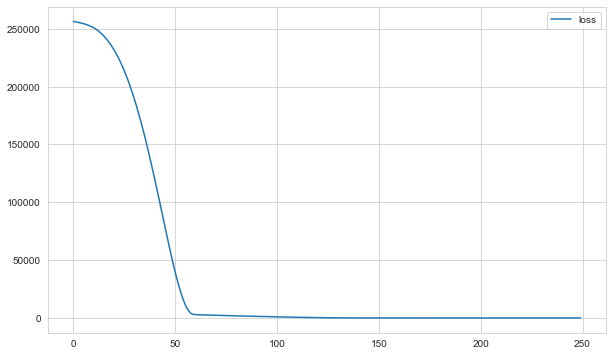

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

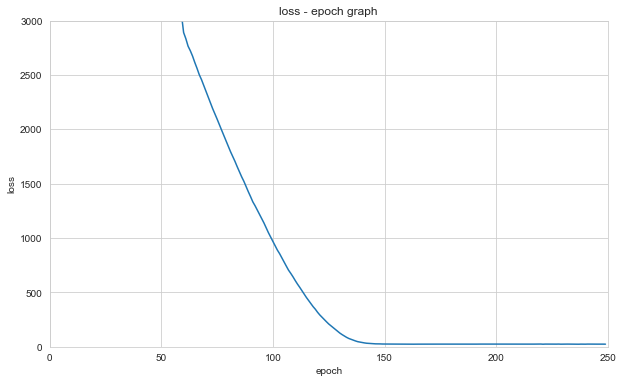

In [43]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [45]:
model.evaluate(X_train, y_train, verbose=0)

25.540666580200195

In [46]:
model.evaluate(X_test, y_test, verbose=0)

28.17010498046875

In [47]:
y_pred = model.predict(X_test)

In [48]:
explained_variance_score(y_test, y_pred)

0.9971401110052485

In [49]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

Actual    Pred
192 579.558 589.670
250 462.005 467.429
54  637.310 643.690
160 604.573 606.628
287 383.934 389.371
243 528.440 516.977
181 499.212 502.246
266 442.934 449.729
128 502.902 512.661
8   551.650 551.025

<AxesSubplot:xlabel='Actual', ylabel='Pred'>

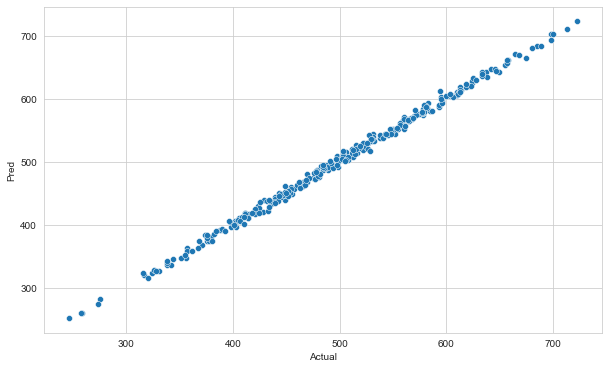

In [50]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [51]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [52]:
eval_metric(y_test, y_pred)

r2_score: 0.996795950125478 
mae: 4.310128886472702 
mse: 28.17010795435957 
rmse: 5.3075519737784544


## Final Model and Model Deployment

In [53]:
scaler = MinMaxScaler().fit(X)

In [54]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [55]:
X_scaled = scaler.transform(X)

In [56]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 871us/step - loss: 257398.9531
Epoch 2/250
32/32 [==============================] - 0s 968us/step - loss: 257276.2969
Epoch 3/250
32/32 [==============================] - 0s 903us/step - loss: 257143.2031
Epoch 4/250
32/32 [==============================] - 0s 871us/step - loss: 256988.8906
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 256809.2344
Epoch 6/250
32/32 [==============================] - 0s 896us/step - loss: 256602.7812
Epoch 7/250
32/32 [==============================] - 0s 807us/step - loss: 256365.3125
Epoch 8/250
32/32 [==============================] - 0s 936us/step - loss: 256093.7812
Epoch 9/250
32/32 [==============================] - 0s 839us/step - loss: 255782.7188
Epoch 10/250
32/32 [==============================] - 0s 904us/step - loss: 255423.4688
Epoch 11/250
32/32 [==============================] - 0s 871us/step - loss: 255015.5156
Epoch 12/250
32/32 [=======================

32/32 [==============================] - 0s 1ms/step - loss: 1337.8162
Epoch 96/250
32/32 [==============================] - 0s 807us/step - loss: 1300.7693
Epoch 97/250
32/32 [==============================] - 0s 839us/step - loss: 1258.6661
Epoch 98/250
32/32 [==============================] - 0s 807us/step - loss: 1218.3038
Epoch 99/250
32/32 [==============================] - 0s 936us/step - loss: 1173.7257
Epoch 100/250
32/32 [==============================] - 0s 871us/step - loss: 1131.5259
Epoch 101/250
32/32 [==============================] - 0s 807us/step - loss: 1081.8386
Epoch 102/250
32/32 [==============================] - 0s 968us/step - loss: 1046.0778
Epoch 103/250
32/32 [==============================] - 0s 936us/step - loss: 1008.7119
Epoch 104/250
32/32 [==============================] - 0s 903us/step - loss: 971.9835
Epoch 105/250
32/32 [==============================] - 0s 839us/step - loss: 932.5491
Epoch 106/250
32/32 [==============================] - 0s 871us/s

32/32 [==============================] - 0s 1ms/step - loss: 24.6794
Epoch 192/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4755
Epoch 193/250
32/32 [==============================] - 0s 936us/step - loss: 24.5787
Epoch 194/250
32/32 [==============================] - 0s 871us/step - loss: 24.4083
Epoch 195/250
32/32 [==============================] - 0s 903us/step - loss: 24.9558
Epoch 196/250
32/32 [==============================] - 0s 936us/step - loss: 24.5956
Epoch 197/250
32/32 [==============================] - 0s 903us/step - loss: 24.5703
Epoch 198/250
32/32 [==============================] - 0s 871us/step - loss: 24.6709
Epoch 199/250
32/32 [==============================] - 0s 843us/step - loss: 24.6791
Epoch 200/250
32/32 [==============================] - 0s 774us/step - loss: 24.6348
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6972
Epoch 202/250
32/32 [==============================] - 0s 903us/step - loss: 24.5052


H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [57]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model_fake_reg = load_model('model_fake_reg.h5')

In [60]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [61]:
sample = [[998, 1000]]

In [62]:
sample_scaled = scaler_fake_reg.transform(sample)

In [63]:
model_fake_reg.predict(sample_scaled)

array([[417.97302]], dtype=float32)

## Prediction-2

In [64]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [65]:
sample = pd.DataFrame(my_dict)
sample

Feature1  Feature2
0       997      1000
1       998       999
2       999       998
3      1000       997
4      1001       996

In [66]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [67]:
model_fake_reg.predict(sample_scaled)

array([[377.9846 ],
       [329.74545],
       [281.50626],
       [233.26712],
       [185.02797]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___